<a href="https://colab.research.google.com/github/phytometrics/plant_phenotyping_python/blob/main/notebooks/image_analysis_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## データのダウンロード

In [1]:
# wgetでデータセット圧縮ファイルをダウンロードし、unzipで解凍する。
url = "https://raw.githubusercontent.com/phytometrics/plant_phenotyping_python/dev/notebooks/assets/basics/rice_two_class_seeds.zip"
!wget -O rice_two_class_seeds.zip {url}
!unzip rice_two_class_seeds.zip

--2023-11-04 06:12:04--  https://raw.githubusercontent.com/phytometrics/plant_phenotyping_python/dev/notebooks/assets/basics/rice_two_class_seeds.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 389458 (380K) [application/zip]
Saving to: ‘rice_two_class_seeds.zip’

rice_two_class_seed 100%[===================>] 380.33K  --.-KB/s    in 0.05s   

2023-11-04 06:12:04 (7.27 MB/s) - ‘rice_two_class_seeds.zip’ saved [389458/389458]



## 画像操作の基礎

In [7]:
import os
import cv2
import matplotlib.pyplot as plt

In [27]:
# 画像の読み込み
path = "/content/image/train/proper/100.jpg"
original_image = cv2.imread(path)
# 画像の大きさやdtypeを確認。
print(original_image.shape)
print(original_image.dtype)  # uint8は0-255の値の整数値を取る。

(32, 32, 3)
uint8


---
opencvで読み込んだ画像はBGR画像です。matplotなど他のライブラリでは、RGB画像を前提としている場合があり、その場合は変換する必要があります。

In [33]:
image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

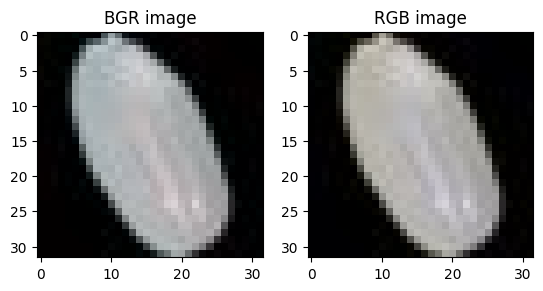

In [36]:
# plt.subplotを使用してBGR画像とRGB画像を横に並べて比較してみましょう。
plt.subplot(1,2,1)
plt.title("BGR image")
plt.imshow(original_image)

plt.subplot(1,2,2)
plt.imshow(image)
plt.title("RGB image")

plt.show()

----
変数imageのshapeは（32,32,3）で、最後の次元はRGBの３チャンネルであることを意味します。RGBそれぞれに分解し、表示してみましょう。

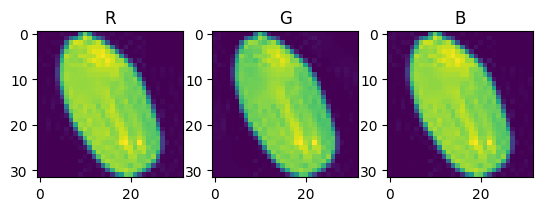

In [31]:
R = image[:,:,0]
B = image[:,:,1]
G = image[:,:,2]

# subplotで一度に３画像分表示する。
plt.subplot(1,3,1)
plt.title("R")
plt.imshow(R)
plt.subplot(1,3,2)
plt.title("G")
plt.imshow(G)
plt.subplot(1,3,3)
plt.title("B")
plt.imshow(B)
plt.show()


コードが少し長くて冗長ですね。ライブラリやfor loopを使って簡潔に表現してみましょう。

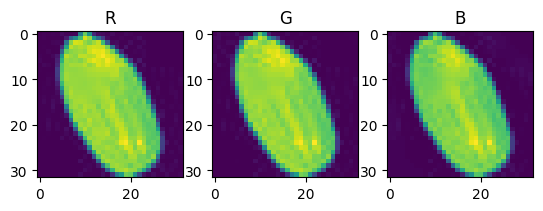

In [32]:
# 画像をチャンネル毎に分割する。
# cv2.splitはチャンネルを分割するだけの機能であるため、入力がRGB画像であれば取り出す順番はR,G,Bとなる。
R,G,B = cv2.split(image)
# enumerateで使用可能となるiを用い、
# どのsubplotに描画するかを指定し、zipでチャンネルの名前を同時に取り出してtitleに使用する。
for i, (channel, name) in enumerate(zip([R, G, B], ["R","G","B"])):
    plt.subplot(1, 3, i+1)
    plt.title(name)
    plt.imshow(channel)

---
先程のcv2.cvtColor()を使用して、グレースケール画像に変換します。

(32, 32)


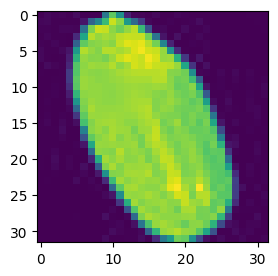

In [39]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# BGR画像を変換する場合はcv2.COLOR_BGR2GRAYを使用します。
print(gray.shape)

plt.figure(figsize=(3,3))
plt.imshow(gray)

グレースケール画像のはずなのに色がついてしまいました。これはmatplotlibがシングルチャンネルにpseudo-color（matplotlibではcmap argumentでコントロールすることができます）を適用しているためです。カラーバーを表示させたり、他のcmapを使用してみましょう。

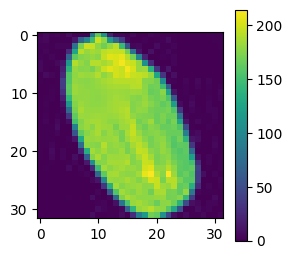

In [43]:
# カラーバーの追加
plt.figure(figsize=(3,3))
plt.imshow(gray)
plt.colorbar()
plt.show()

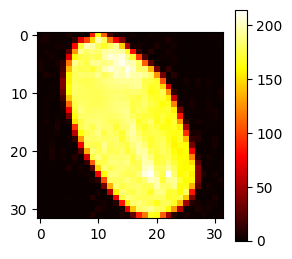

In [44]:
# 他のcmapの適用
plt.figure(figsize=(3,3))
plt.imshow(gray,cmap="hot")
plt.colorbar()
plt.show()

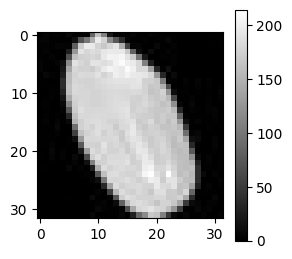

In [45]:
# 本来のグレースケールでの表示
plt.figure(figsize=(3,3))
plt.imshow(gray,cmap="gray")
plt.colorbar()
plt.show()

画像の保存はcv2.imwriteで行うことができます。第一引数に保存するパス、第二引数に保存する画像変数を指定します。

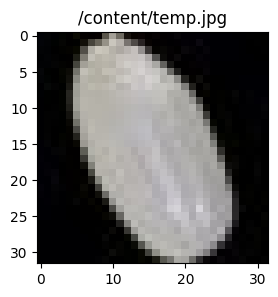

In [55]:
path = "/content/temp.jpg"

cv2.imwrite(path, original_image)

image2 = cv2.imread(path)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(3,3))
plt.title(path)
plt.imshow(image2)

## 画像の切り抜き・リサイズ

(10, 10, 3)


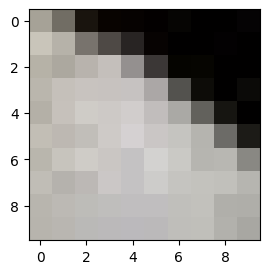

In [48]:
# 左上を原点とし、y座標0〜１０、x座標10〜２０、色チャンネルは全てを指定した切り抜きをする。
rgb_crop = image[0:10, 10:20, :]
print(rgb_crop.shape)
plt.figure(figsize=(3,3))
plt.imshow(rgb_crop)

(10, 10)


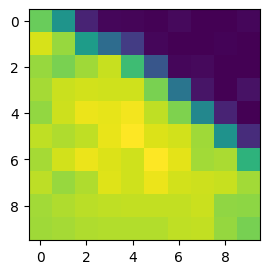

In [56]:
# 同様の操作を二次元のグレースケール画像に行う場合は三次元目がないことに注意。
gray_crop = gray[0:10, 10:20]
print(gray_crop.shape)
plt.figure(figsize=(3,3))
plt.imshow(gray_crop)

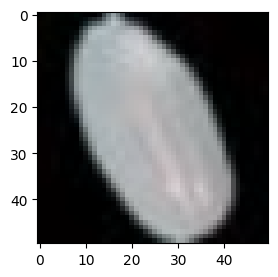

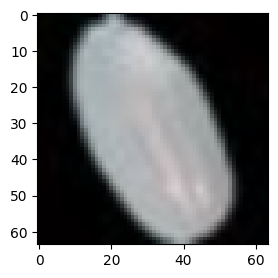

In [116]:
# cv2.resizeで画像の拡大縮小をすることができます。
image2 = cv2.resize(original_image, dsize=(50,50))
plt.figure(figsize=(3,3))
plt.imshow(image2)
plt.show()
# スケールファクターによる指定も可能です
image3 = cv2.resize(original_image, dsize=None, fx=2, fy=2)
plt.figure(figsize=(3,3))
plt.imshow(image3)
plt.show()

## 画像からオブジェクトの単離・形状解析

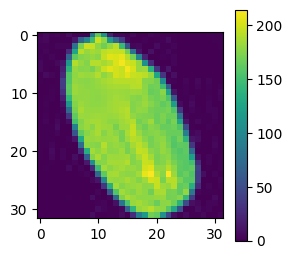

In [62]:
path = "/content/image/train/proper/100.jpg"
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(3,3))
plt.imshow(gray)
plt.colorbar()

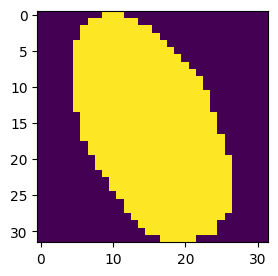

In [64]:
bw = gray > 50
plt.figure(figsize=(3,3))
plt.imshow(bw)

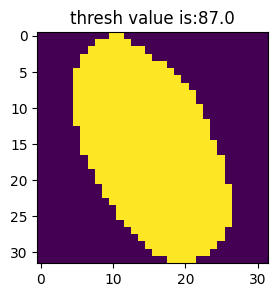

In [74]:
# 手動で閾値を求めることが難しい場合、自動で算出することもできます。
# 以下はotsu法による閾値算出
thresh_val, bw = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(3,3))
plt.title("thresh value is:"+ str(thresh_val))
plt.imshow(bw)

In [84]:
import numpy as np
# 面積などであればnumpyの機能を使い、Trueの数を数えれば事足ります。
area = np.count_nonzero(bw)
print(area)

466


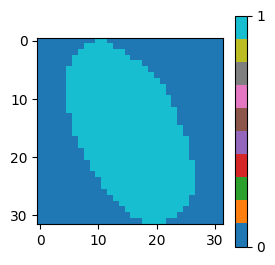

In [109]:
# 画像中のオブジェクトの形状を解析するため、scikit-image(skimage)のlabelとregionpropsの組み合わせがよく使われます。
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

lbl_image = label(bw)

#ラベルイメージ変換すると、連続する接続領域ごとに固有の整数値が割り振られた画像に変換されます。
plt.figure(figsize=(3,3))
plt.imshow(lbl_image,cmap="tab10")
plt.colorbar(ticks=MaxNLocator(integer=True))


In [97]:
# regionpropsによる領域解析
props = regionprops(lbl_image)
# 検出ラベル領域ごとにRegionProperties objectのリストが生成されます。
# 今回は領域が１つしかないので要素１つのリストとなります。
print(props)
prop = props[0]

In [100]:
# regionpropsのメソッドをつかうことで様々な形状を求めることができます。

print(prop.area)  # 面積
print(prop.bbox)  # 外接四角形の座標（bounding box）
print(prop.axis_major_length,prop.axis_major_length)  # 短軸長、長軸長
print(prop.centroid)  # 重心

466
(0, 5, 32, 27)
33.771956297373166 33.771956297373166
(15.854077253218884, 15.343347639484978)


regionpropsのメソッドは公式ドキュメントを参照してください。

https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops

## 画像への描画

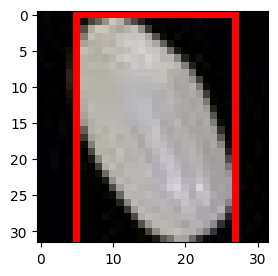

In [108]:
path = "/content/image/train/proper/100.jpg"
orig_image = cv2.imread(path)
orig_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)

# 画像に描画すると元の画像が不可逆的に編集されるので、copyなどを使って保護する。
# imageが編集されてもorig_imageは変更されない。
image = orig_image.copy()

# 例えば前述のregionpropで求められたbboxを描画する。
# regoinpropのbboxはymin,xmin,ymax,xmaxである一方、
# cv2.rectangleは(xmin,ymin)、(xmax,ymax)の座標を要求することに注意
cv2.rectangle(image, (5,0), (27,32), (255,0,0), 1)

# 必要に応じてcv2.imwriteで保存。

plt.figure(figsize=(3,3))
plt.imshow(image)
